In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [8]:
input_pbs = pd.read_csv('notebook8-LDAFeature-thispbs.csv')

In [9]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)
# input_pbs.drop('Unnamed: 0.1', axis=1,inplace=True)
# input_pbs.drop('Unnamed: 1', axis=1, inplace=True)

In [10]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0,0.000000,0.000000,0.390909,0.000000,0.000000,0.000000,0.090266,0.000000,0.000000,0.000000,0.252755,0.210508
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0,0.000000,0.174502,0.000000,0.000000,0.000000,0.108335,0.000000,0.000000,0.000000,0.000000,0.642159,0.000000
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0,0.208703,0.013894,0.183520,0.013894,0.013894,0.013894,0.013894,0.013895,0.482727,0.013895,0.013894,0.013894
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1,0.260417,0.010419,0.010419,0.010419,0.010419,0.010419,0.135420,0.135354,0.010419,0.010419,0.010419,0.385459
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1,0.011907,0.154779,0.011907,0.154767,0.011907,0.011907,0.154622,0.297717,0.011907,0.011907,0.011907,0.154763


In [11]:
input_pbs['view'].describe()

count    2.753800e+04
mean     2.455730e+03
std      1.272891e+04
min      2.000000e+01
25%      2.530000e+02
50%      5.620000e+02
75%      1.559000e+03
max      1.208350e+06
Name: view, dtype: float64

In [12]:
MAXVIEW = input_pbs['view'].max()
MAXVIEW

1208350

In [13]:
view_mean = input_pbs['view'].describe()['mean']
view_sd = input_pbs['view'].describe()['std']

In [14]:
input_pbs['view'].describe()

count    2.753800e+04
mean     2.455730e+03
std      1.272891e+04
min      2.000000e+01
25%      2.530000e+02
50%      5.620000e+02
75%      1.559000e+03
max      1.208350e+06
Name: view, dtype: float64

In [15]:
len(input_pbs)

27538

## Feature extraction

In [16]:
# input_pbs_train, input_pbs_test = train_test_split(input_pbs, test_size=0.2,random_state=100)

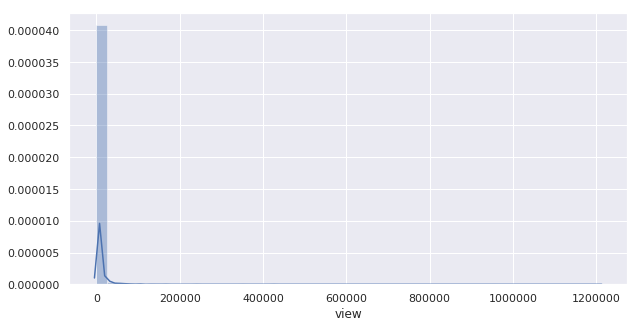

In [25]:
f, axarr = plt.subplots( figsize=(10,5))
sns.distplot(input_pbs['view'])

In [26]:
view_df = pd.DataFrame(input_pbs['view'])

In [27]:
view_df.shape

(27538, 1)

In [28]:
from sklearn.cluster import KMeans

In [29]:
k=2

In [30]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(view_df)
kmeans.cluster_centers_

array([[   2377.24382626],
       [1083056.5       ]])

In [31]:
input_pbs['class'] = 0

In [32]:
for i in range(9):
    split_class = np.argmax(input_pbs['class'].value_counts())
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pd.DataFrame(input_pbs[input_pbs['class']==split_class]['view']))
#     print(kmeans.cluster_centers_)
#     print(input_pbs_train['class'].value_counts())
    if len(np.argwhere(kmeans.labels_ == 0)) < len(np.argwhere(kmeans.labels_ == 1)):
        tmp = np.argwhere(kmeans.labels_ == 0)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 1)] = split_class
        kmeans.labels_[tmp] = 9-i
    else:
        tmp = np.argwhere(kmeans.labels_ == 1)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 0)] = split_class
        kmeans.labels_[tmp] = 9-i
    input_pbs.loc[(input_pbs['class'] == split_class), 'class'] = kmeans.labels_
#     print(input_pbs_train['class'].value_counts())


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current 

In [33]:
print(input_pbs['class'].value_counts())

3    5294
5    4933
0    3702
2    3410
4    3371
6    3019
1    2447
7    1137
8    223 
9    2   
Name: class, dtype: int64


In [34]:
input_pbs.groupby('class')['view'].describe()['max']

class
0    259.0    
1    1029.0   
2    159.0    
3    476.0    
4    730.0    
5    2682.0   
6    9098.0   
7    37581.0  
8    425513.0 
9    1208350.0
Name: max, dtype: float64

In [35]:
input_pbs = input_pbs[(input_pbs['class']!=6)&(input_pbs['class']!=7)&(input_pbs['class']!=8)&(input_pbs['class']!=9)]

In [36]:
# input_pbs = input_pbs[(input_pbs['class']!=5)]

In [37]:
# input_pbs_train.loc[(input_pbs_train['class'] == 5), 'class'] = 4
# input_pbs_train.loc[(input_pbs_train['class'] == 6), 'class'] = 4
# input_pbs_train.loc[(input_pbs_train['class'] == 7), 'class'] = 4

In [38]:
print(input_pbs['class'].value_counts())

3    5294
5    4933
0    3702
2    3410
4    3371
1    2447
Name: class, dtype: int64


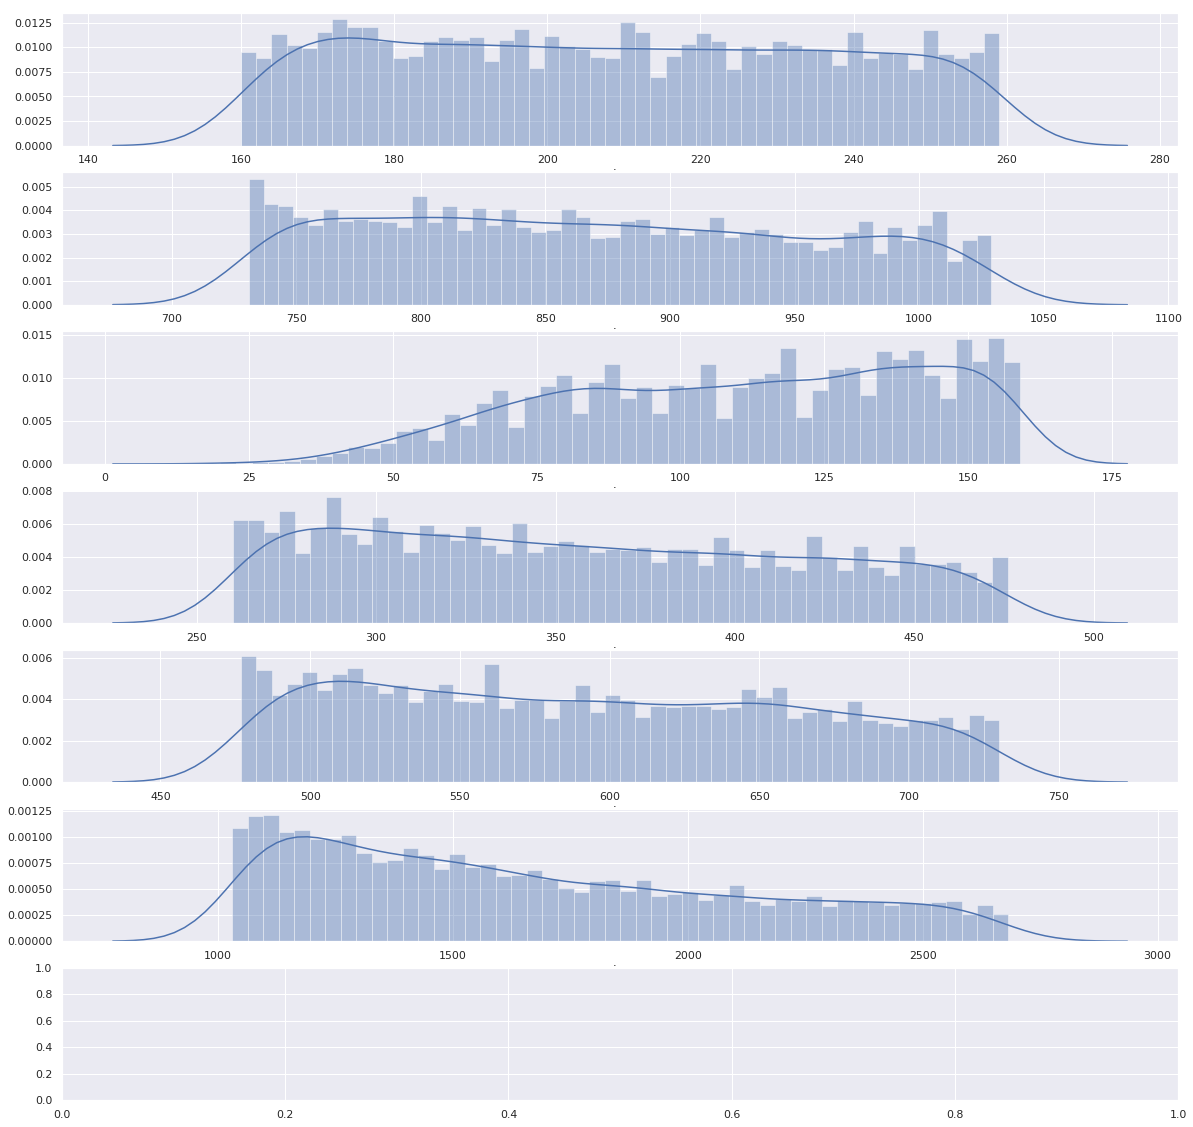

In [39]:
f, axarr = plt.subplots(7, figsize=(20,20))
for i in range(7):
#     print(i,len(input_pbs_train[input_pbs_train['class']==i]))
    if len(input_pbs[input_pbs['class']==i]) > 1:
        sns.distplot(input_pbs[input_pbs['class']==i]['view'],ax=axarr[i],bins=50)


In [40]:
input_pbs_train, input_pbs_test = train_test_split(input_pbs, test_size=0.2,random_state=100)

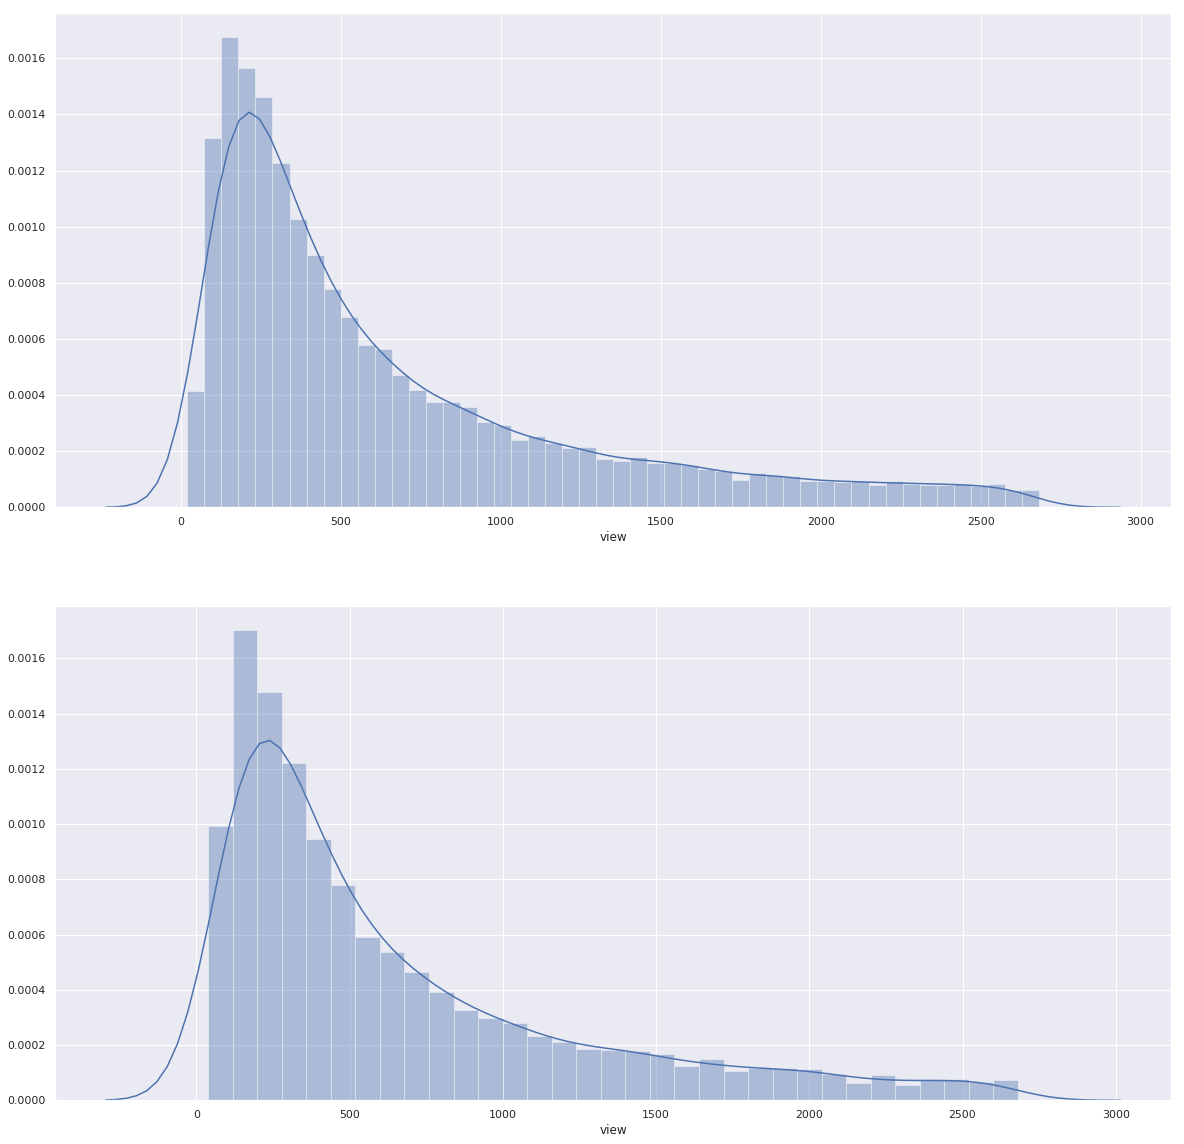

In [41]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_pbs_train['view'],ax=axarr[0])
sns.distplot(input_pbs_test['view'],ax=axarr[1])

## Bag of word feature

In [42]:
inputText_train = []
for sent in input_pbs_train['token']:
    inputText_train.append(sent.split(','))

In [43]:
inputText_test = []
for sent in input_pbs_test['token']:
    inputText_test.append(sent.split(','))

In [44]:
np.log(input_pbs_train['view']).describe()

count    18525.000000
mean     6.094259    
std      0.930808    
min      2.995732    
25%      5.407172    
50%      6.070738    
75%      6.815640    
max      7.894318    
Name: view, dtype: float64

In [45]:
# MINVIEW

In [46]:
# f, axarr = plt.subplots(2, figsize=(20,20))
# sns.distplot(inputLabel_train,ax=axarr[0])
# sns.distplot(inputLabel_test,ax=axarr[1])

In [47]:
# print(len(inputText_train),len(inputLabel_train))

In [48]:
# print(len(inputText_test),len(inputLabel_test))

In [49]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//10]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [50]:
len(word_count)

1633

In [51]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [52]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [53]:
len(all_token)

1635

In [54]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [55]:
input_data_train = np.asarray(input_pbs_train['token'].str.split(','))
input_data_test = np.asarray(input_pbs_test['token'].str.split(','))

In [56]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [57]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

In [58]:
x_f1_train.shape

(18525, 1635)

## Numerical feature

In [59]:
input_pbs.columns

Index(['headline', 'date', 'DOW', 'time', 'view', 'category', 'tag', 'hour',
       'numTag', 'token',
       ...
       'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8',
       'Topic 9', 'Topic 10', 'Topic 11', 'class'],
      dtype='object', length=102)

In [60]:
numerical_feature = [
       'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst','Topic 0','Topic 1','Topic 2', 'Topic 3',
        'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
        'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']

# numerical_feature = [
#        'numTag', 'numToken', 'numChar','timeDelta', 'num_noun', 'num_verb',
#         'num_determiner',  'num_classifier',
#          'num_interjunction', 'num_prefix',
#        'num_ending', 'num_negator', 'num_punctuation',
#        'nnoun_per_ntoken', 'nverb_per_ntoken', 
#        'num_email', 'num_law', 'num_location',
#         'num_organization', 'num_percent', 'num_person',
#        'num_phone',  'num_pos',
#        'num_neg', 'sim_top', 'sim_worst', 'tag_pop_sum',
#        'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
#        'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst','Topic 0','Topic 1','Topic 2', 'Topic 3',
#         'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
#         'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','num_tag_worst',
#                      'tag_top_worst_sum', 'tag_top_worst_mean','numChar','num_location','sim_worst',
#                     'num_verb','num_noun','nverb_per_ntoken']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean']

# numerical_feature = ['num_tag_pop','tag_top_pop_sum', 'tag_top_pop_mean','sim_top','numTag','tag_pop_sum',
#                      'num_person','num_classifier','tag_pop_mean','timeDelta','sim_worst','numChar',
#                     'numTag','nnoun_per_ntoken','nverb_per_ntoken','numToken','num_noun','num_verb',
#                      'tag_top_worst_sum','num_neg','tag_top_worst_mean','num_person','num_classifier',
#                     'num_location','num_pos','num_tag_worst','num_organization']

In [61]:
len(numerical_feature)

58

In [62]:
cs = MinMaxScaler()

In [63]:
trainContinuous = cs.fit_transform(input_pbs_train[numerical_feature])
testContinuous = cs.fit_transform(input_pbs_test[numerical_feature])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
trainContinuous.shape

(18525, 58)

## Categorial feature

In [65]:
categorial_feature = ['DOW', 'hour',
        'month', 'year',
        'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'is_pos',
       'is_neg']

# categorial_feature = ['DOW', 'hour',
#         'month', 'year',
#         'is_environment',
#        'is_crime', 'is_social',
#          'is_science', 
#         'is_Mon', 'is_Tue', 'is_Wed',
#        'is_Thu', 'is_Fri',   'is_weekend', 'is_pos',
#        'is_neg']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [66]:
len(categorial_feature)

34

In [67]:
lb = preprocessing.LabelBinarizer()

In [68]:
# zipBinarizer = lb.fit(input_pbs["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_pbs_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_pbs_test["DOW"])
# zipBinarizer = lb.fit(input_pbs["month"])
# trainCategorical_month = zipBinarizer.transform(input_pbs_train["month"])
# testCategorical_month = zipBinarizer.transform(input_pbs_test["month"])
# zipBinarizer = lb.fit(input_pbs["year"])
# trainCategorical_year = zipBinarizer.transform(input_pbs_train["year"])
# testCategorical_year = zipBinarizer.transform(input_pbs_test["year"])
# zipBinarizer = lb.fit(input_pbs["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_pbs_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_pbs_test["hour"])
# zipBinarizer = lb.fit(input_pbs["category"])
# trainCategorical_category = zipBinarizer.transform(input_pbs_train["category"])
# testCategorical_category = zipBinarizer.transform(input_pbs_test["category"])
# zipBinarizer = lb.fit(input_pbs["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_pbs_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_pbs_test["sentiment"])

## Concat feature

In [69]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])
print(tmp_train.shape)

for f in categorial_feature:
    zipBinarizer = lb.fit(input_pbs[f])
    trainCategorical = zipBinarizer.transform(input_pbs_train[f])
    testCategorical = zipBinarizer.transform(input_pbs_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

(18525, 1693)


In [70]:
x_train = tmp_train
x_test = tmp_test

In [71]:
x_train.shape

(18525, 1767)

In [72]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [73]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [74]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## create y

In [75]:
view_bound = list(input_pbs_train.groupby('class')['view'].describe()['max'])

In [76]:
view_bound

[259.0, 1029.0, 159.0, 476.0, 730.0, 2682.0]

In [77]:
view_bound = sorted(view_bound)

In [78]:
view_bound

[159.0, 259.0, 476.0, 730.0, 1029.0, 2682.0]

In [79]:
inputLabel_train_class = []
for view in input_pbs_train['view']:
    if view <= view_bound[0] :
        inputLabel_train_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_train_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_train_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_train_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_train_class.append(4)
#     elif view <= view_bound[5] : 
#         inputLabel_train_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_train_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_train_class.append(7)
    else:
        inputLabel_train_class.append(5)

In [80]:
inputLabel_test_class = []
for view in input_pbs_test['view']:
    if view <= view_bound[0] :
        inputLabel_test_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_test_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_test_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_test_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_test_class.append(4)
#     elif view <= view_bound[5] : 
#         inputLabel_test_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_test_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_test_class.append(7)
    else:
        inputLabel_test_class.append(5)

In [81]:
y_train_class = inputLabel_train_class
y_train_class = np.asarray(y_train_class).reshape(-1,1)
y_test_class = inputLabel_test_class
y_test_class = np.asarray(y_test_class).reshape(-1,1)

In [82]:
y_train_class, y_val_class = train_test_split(y_train_class, test_size=0.2,random_state=100)

In [83]:
MAXVIEW_log = np.log(input_pbs['view']).describe()['max']

In [84]:
inputLabel_train_view = []
for view in input_pbs_train['view']:
    inputLabel_train_view.append(np.log(view+0.00001)/MAXVIEW_log)

In [85]:
inputLabel_test_view = []
for view in input_pbs_test['view']:
    inputLabel_test_view.append(np.log(view+0.00001)/MAXVIEW_log)

In [97]:
input_pbs['class2'] = 0

In [98]:
for index, row in input_pbs.iterrows():
    if row['view'] <= view_bound[0] :
        input_pbs.loc[index, 'class2'] = 0
    elif row['view'] <= view_bound[1] :
        input_pbs.loc[index, 'class2'] = 1
    elif row['view'] <= view_bound[2] :
        input_pbs.loc[index, 'class2'] = 2
    elif row['view'] <= view_bound[3] :
        input_pbs.loc[index, 'class2'] = 3
    elif row['view'] <= view_bound[4] :
        input_pbs.loc[index, 'class2'] = 4
    else:
        input_pbs.loc[index, 'class2'] = 5

In [102]:
print("number of data in each class")
input_pbs['class2'].value_counts()

number of data in each class


2    5294
5    4933
1    3702
0    3410
3    3371
4    2447
Name: class2, dtype: int64

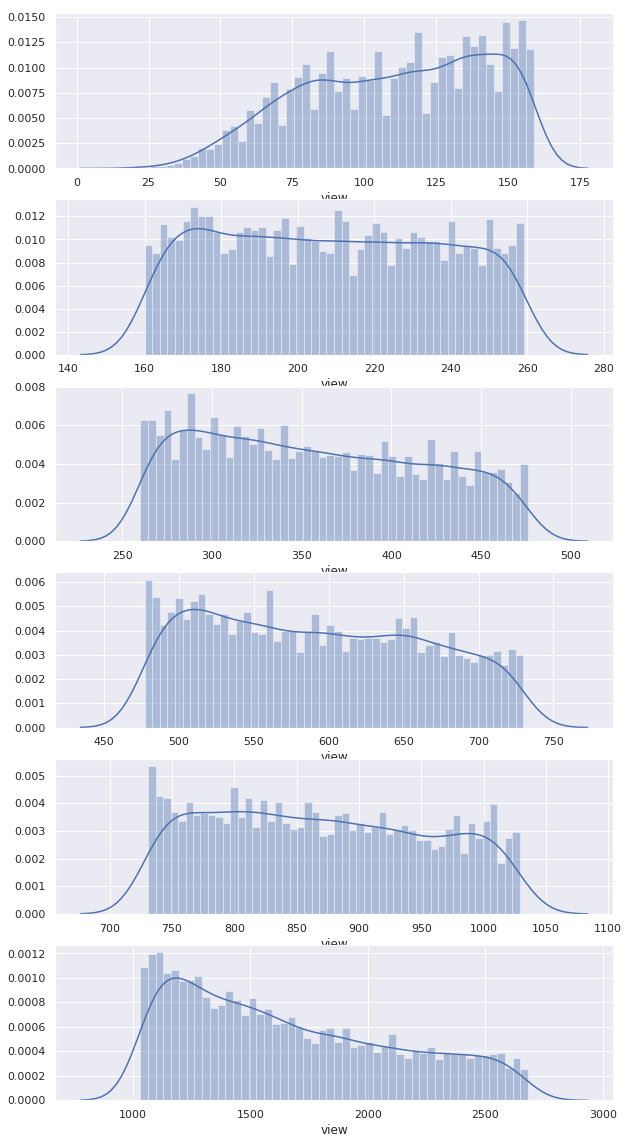

In [101]:
f, axarr = plt.subplots(6, figsize=(10,20))
for i in range(6):
#     print(i,len(input_pbs_train[input_pbs_train['class']==i]))
    if len(input_pbs[input_pbs['class2']==i]) > 1:
        sns.distplot(input_pbs[input_pbs['class2']==i]['view'],ax=axarr[i],bins=50)

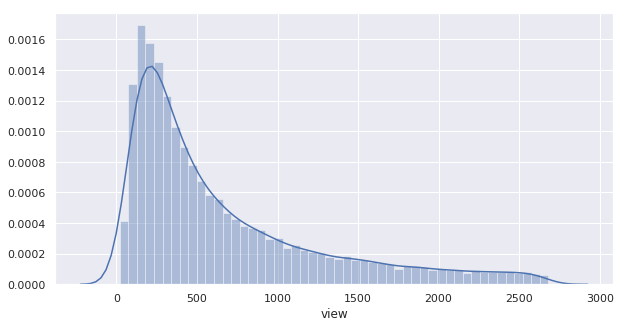

In [106]:
f, axarr = plt.subplots(1, figsize=(10,5))
sns.distplot(input_pbs['view'])

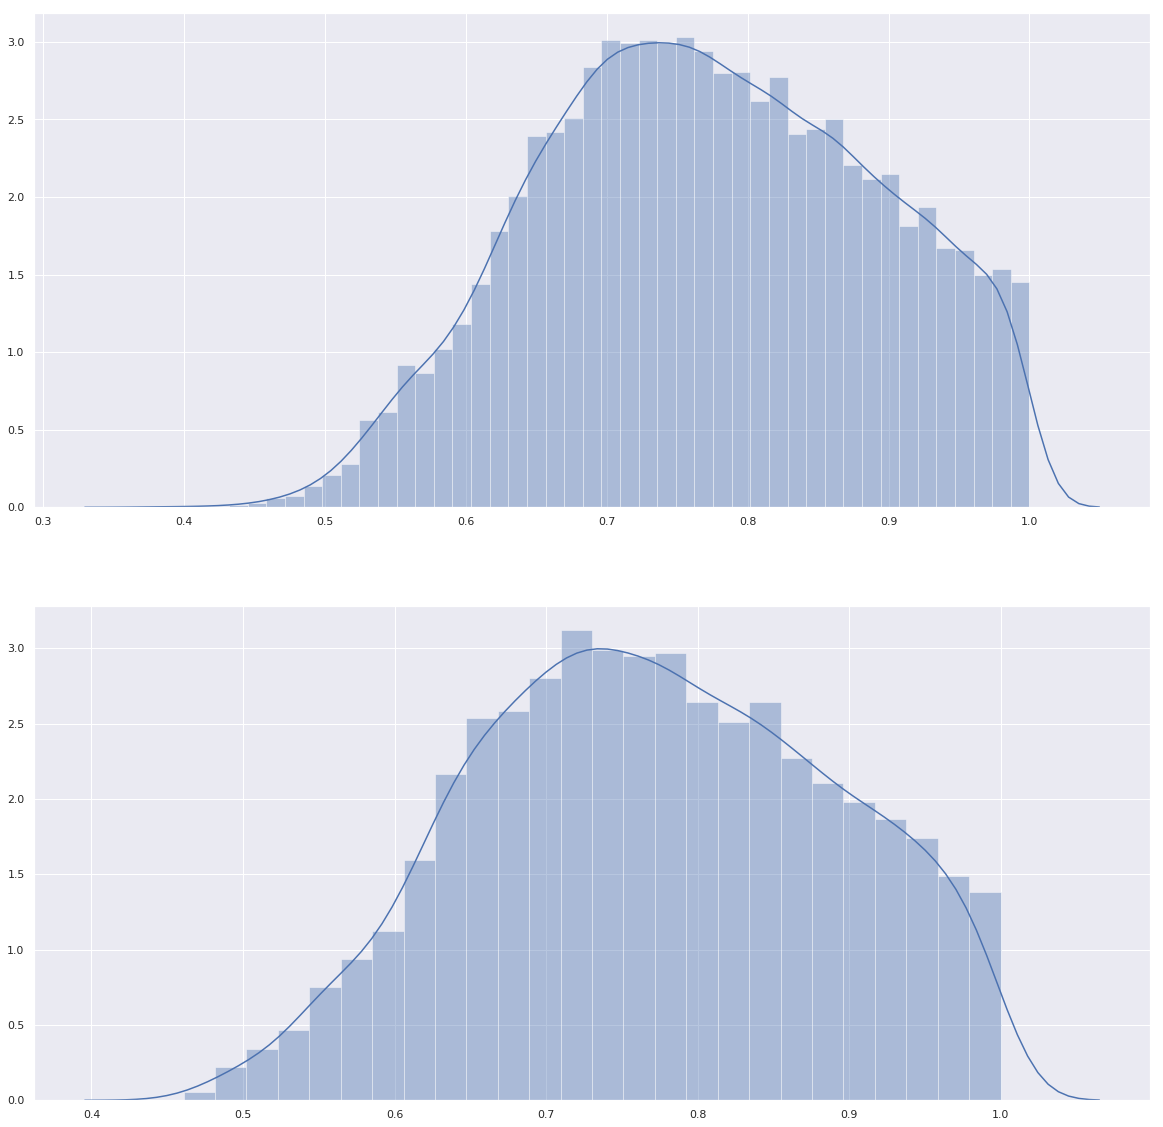

In [81]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(inputLabel_train_view,ax=axarr[0])
sns.distplot(inputLabel_test_view,ax=axarr[1])

In [109]:
y_train_view = inputLabel_train_view
y_train_view = np.asarray(y_train_view).reshape(-1,1)
y_test_view = inputLabel_test_view
y_test_view= np.asarray(y_test_view).reshape(-1,1)

In [110]:
y_train_view, y_val_view = train_test_split(y_train_view, test_size=0.2,random_state=100)

In [111]:
y_test_view.shape

(4632, 1)

## Prepare data for Keras

In [112]:
x_train, x_val = train_test_split(x_train, test_size=0.2,random_state=100)

In [113]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [114]:
x_train.shape

(14820, 1767)

In [115]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (14820, 1767)
val size (3705, 1767)
test size (4632, 1767)


In [116]:
# y_train = inputLabel_train
# y_train = np.asarray(y_train).reshape(-1,1)
# y_test = inputLabel_test
# y_test = np.asarray(y_test).reshape(-1,1)

In [117]:
y_train_class = np_utils.to_categorical(y_train_class)
y_val_class = np_utils.to_categorical(y_val_class)
y_test_class = np_utils.to_categorical(y_test_class)

In [118]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [119]:
print("train size",y_train_class.shape)
print("train size",y_val_class.shape)
print("test size",y_test_class.shape)
print("train size",y_train_view.shape)
print("train size",y_val_view.shape)
print("test size",y_test_view.shape)

train size (14820, 6)
train size (3705, 6)
test size (4632, 6)
train size (14820, 1)
train size (3705, 1)
test size (4632, 1)


## Create Model

In [1479]:
# from sklearn.model_selection import KFold

In [1480]:
# kfold = KFold(10, True, 1)

In [1481]:
# def create_model():
# #     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
#     input1 = Input(shape=(x_train.shape[1],))
# #     x = LSTM(32)(input1)
# #     x = Dense(256, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(128, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(64, activation='relu')(x)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(32, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(16, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

# #     x = Dense(2048, activation='relu')(input1)
# #     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.3)(x)
    
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1,activation='linear')(x)
#     model = Model(inputs=input1, outputs=x)
#     adam  = Adam(lr=0.0001)
#     model.compile(optimizer=adam,  loss='mean_absolute_percentage_error')
    
#     return model


In [127]:
def create_model():
    input1 = Input(shape=(x_train.shape[1],))
#     x = Dense(2048, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    class_out = Dense(6,activation='softmax')(x)
    
    model = Model(inputs=input1, outputs=class_out)
    adam  = Adam(lr=0.0001)
    model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['acc'])
    
    return model


In [199]:
def create_model_2():
    input1 = Input(shape=(x_train.shape[1]+6,))
    x = Dense(256, activation='elu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='elu')(x)
#     x = Dropout(0.5)(x)
    x = Dense(64, activation='elu')(x)
    x = Dropout(0.2)(x)
#     x = Dense(32, activation='elu')(x)
#     x = Dropout(0.2)(x)
    x = Dense(16, activation='elu')(x)
    x = Dropout(0.2)(x)
    view_out = Dense(1,activation='linear')(x)
    
    model = Model(inputs=input1, outputs=view_out)
    adam  = Adam(lr=0.001)
    model.compile(optimizer=adam,  loss='mse') 
    return model


In [128]:
model_class = create_model()
print(model_class.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1767)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               452608    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
__________

In [200]:
model_view = create_model_2()
print(model_view.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 1773)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 256)               454144    
_________________________________________________________________
dropout_61 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_62 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_63 (Dropout)         (None, 16)                0         
__________

In [1486]:
# weight_path='./model_ver2_1.h5'
# callbacks_list = [
#         ModelCheckpoint(
#             weight_path,
#             save_best_only=True,
#             save_weights_only=True,
#             monitor='val_loss',
#             mode='min',
#             verbose=1
#         )
# ]

In [201]:
weight_path_class='./model_class_5.h5'
callbacks_list_class = [
        ModelCheckpoint(
            weight_path_class,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_acc',
            mode='max',
            verbose=1
        )
]
weight_path_view='./model_view_5.h5'
callbacks_list_view = [
        ModelCheckpoint(
            weight_path_view,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [130]:
model_class.fit(x_train,y_train_class, 
          batch_size=32 ,epochs=30, verbose=1, validation_data=[x_val,y_val_class],callbacks=callbacks_list_class)

Train on 14820 samples, validate on 3705 samples
Epoch 1/30
14820/14820 [==============================] - 4s 246us/step - loss: 1.7004 - acc: 0.2707 - val_loss: 1.6111 - val_acc: 0.3258

Epoch 00001: val_acc improved from -inf to 0.32578, saving model to ./model_class_5.h5
Epoch 2/30
14820/14820 [==============================] - 3s 206us/step - loss: 1.5892 - acc: 0.3364 - val_loss: 1.5818 - val_acc: 0.3366

Epoch 00002: val_acc improved from 0.32578 to 0.33657, saving model to ./model_class_5.h5
Epoch 3/30
14820/14820 [==============================] - 3s 202us/step - loss: 1.5195 - acc: 0.3713 - val_loss: 1.5980 - val_acc: 0.3420

Epoch 00003: val_acc improved from 0.33657 to 0.34197, saving model to ./model_class_5.h5
Epoch 4/30
14820/14820 [==============================] - 3s 199us/step - loss: 1.4218 - acc: 0.4172 - val_loss: 1.6382 - val_acc: 0.3385

Epoch 00004: val_acc did not improve from 0.34197
Epoch 5/30
14820/14820 [==============================] - 3s 195us/step - loss

In [1488]:
# model_class.fit(x_train,y_train_class, 
#           batch_size=32 ,epochs=30, verbose=1, validation_data=[x_val,y_val_class],callbacks=callbacks_list_class)

Train on 14820 samples, validate on 3705 samples
Epoch 1/30
14820/14820 [==============================] - 13s 903us/step - loss: 1.6934 - acc: 0.2686 - val_loss: 1.5951 - val_acc: 0.3236

Epoch 00001: val_acc improved from -inf to 0.32362, saving model to ./model_class_4.h5
Epoch 2/30
14820/14820 [==============================] - 4s 275us/step - loss: 1.5881 - acc: 0.3348 - val_loss: 1.5839 - val_acc: 0.3377

Epoch 00002: val_acc improved from 0.32362 to 0.33765, saving model to ./model_class_4.h5
Epoch 3/30
14820/14820 [==============================] - 4s 280us/step - loss: 1.5134 - acc: 0.3678 - val_loss: 1.5899 - val_acc: 0.3333

Epoch 00003: val_acc did not improve from 0.33765
Epoch 4/30
14820/14820 [==============================] - 4s 283us/step - loss: 1.4096 - acc: 0.4179 - val_loss: 1.6193 - val_acc: 0.3331

Epoch 00004: val_acc did not improve from 0.33765
Epoch 5/30
14820/14820 [==============================] - 4s 280us/step - loss: 1.2859 - acc: 0.4758 - val_loss: 1.74

In [135]:
weight_model_class ='./model_class_5.h5'
model_class = create_model()
model_class.load_weights(weight_model_class)
# model._make_predict_functi"on()
model_class.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1767)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               452608    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
__________

In [144]:
x_pred_class_train = model_class.predict(x_train)
x_pred_class_val = model_class.predict(x_val)

In [145]:
x_train_class = np.concatenate((x_train, x_pred_class_train), axis=1)
x_val_class = np.concatenate((x_val, x_pred_class_val), axis=1)

In [202]:
model_view.fit(x_train_class, y_train_view, 
          batch_size=32 ,epochs=30, verbose=1, validation_data=[x_val_class,y_val_view],callbacks=callbacks_list_view)

Train on 14820 samples, validate on 3705 samples
Epoch 1/30
14820/14820 [==============================] - 4s 260us/step - loss: 0.0627 - val_loss: 0.0118

Epoch 00001: val_loss improved from inf to 0.01185, saving model to ./model_view_5.h5
Epoch 2/30
14820/14820 [==============================] - 3s 184us/step - loss: 0.0238 - val_loss: 0.0104

Epoch 00002: val_loss improved from 0.01185 to 0.01045, saving model to ./model_view_5.h5
Epoch 3/30
14820/14820 [==============================] - 3s 177us/step - loss: 0.0160 - val_loss: 0.0108

Epoch 00003: val_loss did not improve from 0.01045
Epoch 4/30
14820/14820 [==============================] - 3s 172us/step - loss: 0.0124 - val_loss: 0.0101

Epoch 00004: val_loss improved from 0.01045 to 0.01014, saving model to ./model_view_5.h5
Epoch 5/30
14820/14820 [==============================] - 3s 174us/step - loss: 0.0103 - val_loss: 0.0104

Epoch 00005: val_loss did not improve from 0.01014
Epoch 6/30
14820/14820 [========================

In [1599]:
# model_view.fit(x_train_class, y_train_view, 
#           batch_size=32 ,epochs=50, verbose=1, validation_data=[x_val_class,y_val_view],callbacks=callbacks_list_view)

Train on 14820 samples, validate on 3705 samples
Epoch 1/50
14820/14820 [==============================] - 14s 930us/step - loss: 0.0575 - val_loss: 0.0113

Epoch 00001: val_loss improved from 10.46005 to 0.01130, saving model to ./model_view_4.h5
Epoch 2/50
14820/14820 [==============================] - 4s 258us/step - loss: 0.0236 - val_loss: 0.0105

Epoch 00002: val_loss improved from 0.01130 to 0.01054, saving model to ./model_view_4.h5
Epoch 3/50
14820/14820 [==============================] - 4s 256us/step - loss: 0.0165 - val_loss: 0.0103

Epoch 00003: val_loss improved from 0.01054 to 0.01027, saving model to ./model_view_4.h5
Epoch 4/50
14820/14820 [==============================] - 4s 253us/step - loss: 0.0129 - val_loss: 0.0101

Epoch 00004: val_loss improved from 0.01027 to 0.01010, saving model to ./model_view_4.h5
Epoch 5/50
14820/14820 [==============================] - 4s 256us/step - loss: 0.0112 - val_loss: 0.0101

Epoch 00005: val_loss improved from 0.01010 to 0.01007


Epoch 00050: val_loss did not improve from 0.00995


In [203]:
weight_model_view ='./model_view_5.h5'
model_view = create_model_2()
model_view.load_weights(weight_model_view)
# model._make_predict_functi"on()
model_view.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 1773)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 256)               454144    
_________________________________________________________________
dropout_64 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_65 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_66 (Dropout)         (None, 16)                0         
__________

## Evaluate Model

In [136]:
y_pred_class = model_class.predict(x_test)

In [137]:
def evaluate_class(y_pred, y_test):
    acc = 0
    pred = list()
    true = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
        true.append(np.argmax(y_test[i]))
    return f1_score(true, pred, average='micro'),pred,true  

In [138]:
f1,pred,true = evaluate_class(y_pred_class,y_test_class)

In [139]:
f1

0.33139032815198616

In [1493]:
# f1

0.3335492227979275

In [1494]:
from sklearn.metrics import accuracy_score

In [1495]:
accuracy_score(true, pred)

0.3335492227979275

In [140]:
def evaluate_heat(y_pred,y_test):
    correct = 0
    wrong = 0
    count = [0,0,0,0,0,0,0,0]
    heatmap =[[0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0]]
    true_pred = [0]*8
    for i in range(len(y_pred)):
        p_level_pred = np.argmax(y_pred[i])
        p_level_test = np.argmax(y_test[i])
        count[p_level_pred]+=1
        heatmap[p_level_test][p_level_pred]+=1
        if(p_level_pred == p_level_test):
            true_pred[p_level_pred] += 1
            correct += 1
        else:
            wrong +=1
    print(np.asarray(heatmap))
    heatmap = [[line[i]/np.sum(line) for i in range(len(line))] for line in heatmap]
    print(count)
    return correct/(correct+wrong), heatmap

In [141]:
score, heatmap = evaluate_heat(y_pred_class, y_test_class)
print(score)
# print(heatmap)

[[348 105 185   0   0  51   0   0]
 [153 115 331   0   0 140   0   0]
 [ 98  91 457   0   0 420   0   0]
 [ 46  38 259   0   0 327   0   0]
 [ 18  18 172   0   0 285   0   0]
 [ 28  26 306   0   0 615   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[691, 393, 1710, 0, 0, 1838, 0, 0]
0.33139032815198616


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


In [142]:
# score, heatmap = evaluate_heat(y_pred_class, y_test_class)
# print(score)
# # print(heatmap)

[[348 105 185   0   0  51   0   0]
 [153 115 331   0   0 140   0   0]
 [ 98  91 457   0   0 420   0   0]
 [ 46  38 259   0   0 327   0   0]
 [ 18  18 172   0   0 285   0   0]
 [ 28  26 306   0   0 615   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
[691, 393, 1710, 0, 0, 1838, 0, 0]
0.33139032815198616


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


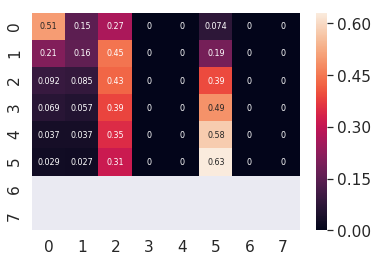

In [143]:
df_cm = pd.DataFrame(heatmap, range(8),
                  range(8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

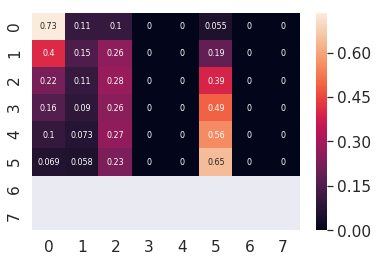

In [1498]:
# df_cm = pd.DataFrame(heatmap, range(8),
#                   range(8))
# sns.set(font_scale=1.4)#for label size
# sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

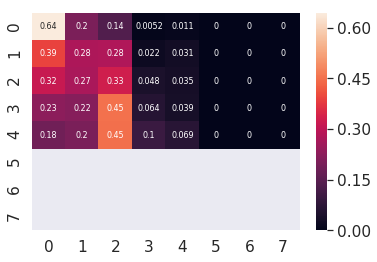

In [955]:
# df_cm = pd.DataFrame(heatmap, range(8),
#                   range(8))
# sns.set(font_scale=1.4)#for label size
# sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

In [204]:
x_test_view = np.concatenate((x_test, y_pred_class), axis=1)

In [205]:
y_pred_view = model_view.predict(x_test_view)

In [206]:
y_pred_view.shape

(4632, 1)

In [207]:
y_test_view.shape

(4632, 1)

In [208]:
mse = mean_squared_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 318351.5990534441
rmse : 564.2265494049744
mae : 380.5253680239151


In [1619]:
# mse = mean_squared_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
# print('mse :',mse)
# print('rmse :',rmse)
# print('mae :',mae)

mse : 322383.3993433607
rmse : 567.788164145186
mae : 377.0211769593521


In [209]:
x_train_class.shape

(14820, 1773)

In [210]:
y_train_view.shape

(14820, 1)

In [211]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_train_class),y_train_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [212]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

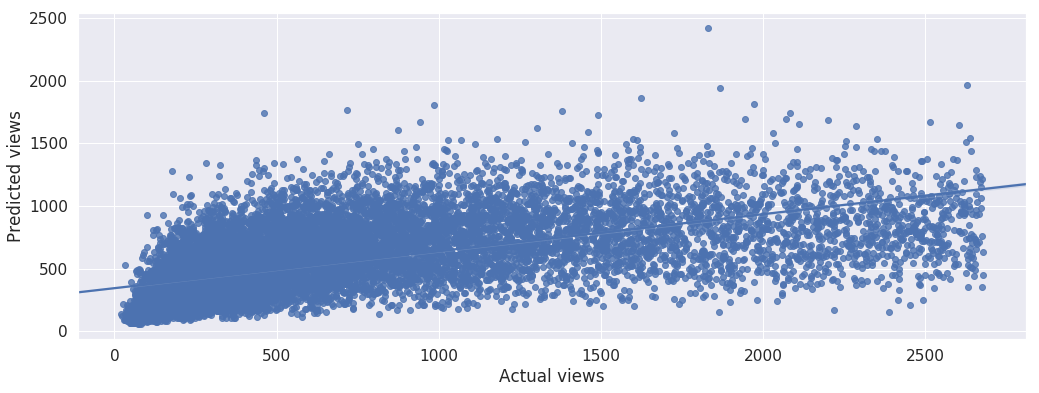

In [213]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


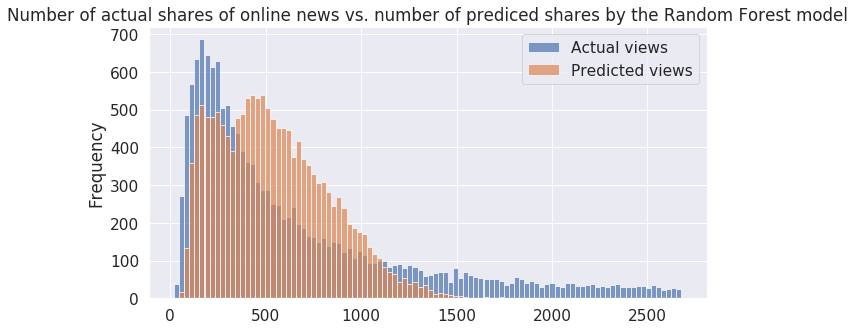

In [214]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [215]:
x_test_view.shape

(4632, 1773)

In [216]:
y_test_view.shape

(4632, 1)

In [217]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_test_view),y_test_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [218]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

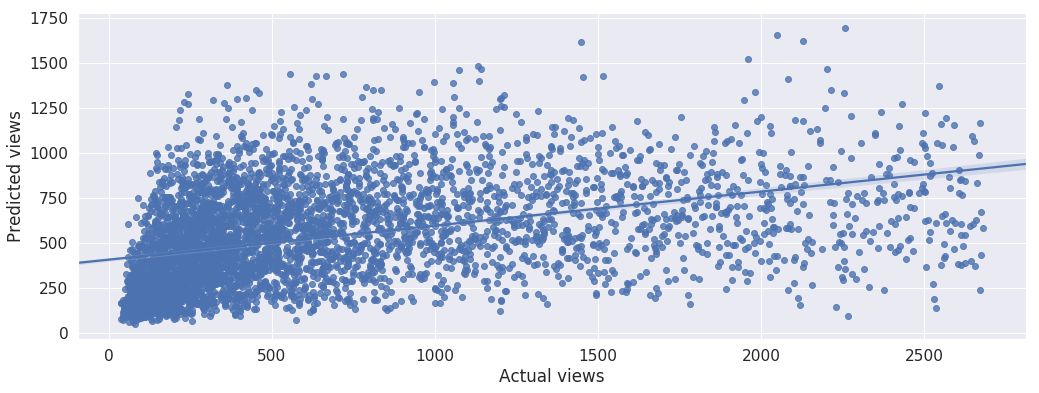

In [219]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

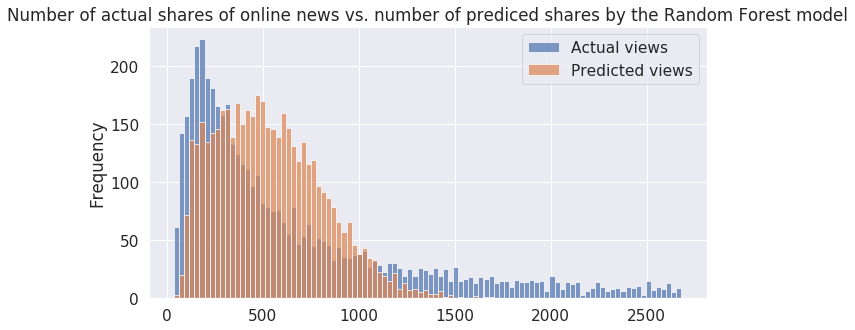

In [220]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [221]:
df_someXdata_LR.shape

(4632, 2)

In [224]:
df_someXdata_LR.to_csv('output-thaipbs.csv')

In [233]:
input_pbs_test.to_csv('headline-test-thaipbs.csv')

## compared to baseline model

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
# some_X_data = X_train_set.iloc[:500]
# some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(lin_reg.predict(x_train),np.exp(y_train_view*MAXVIEW_log))
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

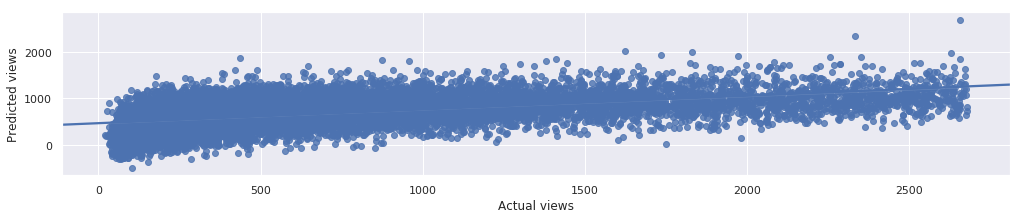

In [127]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

In [131]:
view_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

547607834092591.9

In [132]:
lin_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(lin_mae)

8843906969928.754


In [1570]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [1572]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [1581]:
view_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error( np.exp(y_test_view*MAXVIEW_log), view_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

742.6786714482782

In [1582]:
tree_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(tree_mae)

510.71265112262523


In [1594]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [1595]:
share_predictions = forest_reg.predict(x_test)
forest_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers:5282.35

589.0251566002464

In [1596]:
forest_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
print(forest_mae) #with outliers:1424

412.55604490500866


In [1616]:
df_someXdata = pd.DataFrame(forest_reg.predict(x_test),np.exp(y_test_view*MAXVIEW_log) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,226.00001,283.90001
1,750.00001,919.20001
2,273.00001,359.40001
3,448.00001,617.20001
4,304.00001,1291.40001


AttributeError: module 'seaborn' has no attribute 'plt'

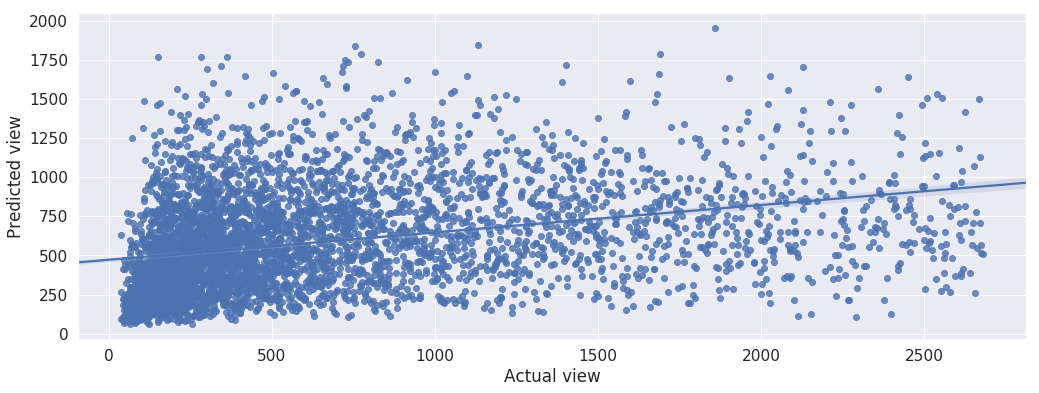

In [1617]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


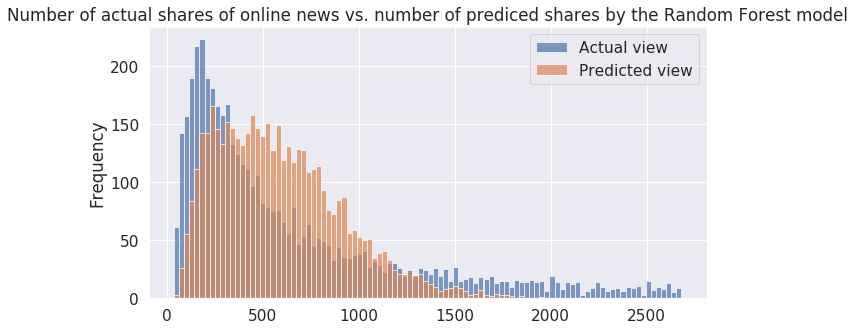

In [1618]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()